## Import relevant libraries

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import sklearn

## Load and cleanse dataset 

In [2]:
# load dataset
mnisttt = input_data.read_data_sets(".", one_hot=False)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [3]:
# define function to plot images
def image_plot(image, size):
    idxs = np.random.randint(len(image), size=size)
    plt.clf()
    f, axarr = plt.subplots(1, size, figsize = (20,20))
    for i in range(0,len(idxs)):
        X = mnisttt.train.images[idxs[i]]
        X = X.reshape([28, 28])
        axarr[i].imshow(X)
        axarr[i].set_axis_off()
    plt.show()

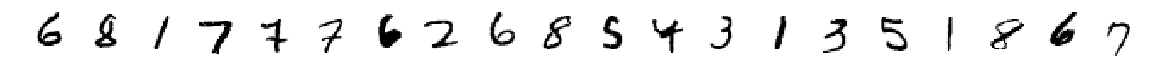

In [4]:
# plot 20 random images
image_plot(mnisttt.train.images, 20)

In [5]:
# print dataset size
print('The size of training image dataset is: ', mnisttt.train.images.shape)
print('The size of training label dataset is: ', mnisttt.train.labels.shape)
print('The size of validation image dataset is: ', mnisttt.validation.images.shape)
print('The size of validation label dataset is: ', mnisttt.validation.labels.shape)
print('The size of testing image dataset is: ', mnisttt.test.images.shape)
print('The size of testing label dataset is: ', mnisttt.test.labels.shape)

The size of training image dataset is:  (55000, 784)
The size of training label dataset is:  (55000,)
The size of validation image dataset is:  (5000, 784)
The size of validation label dataset is:  (5000,)
The size of testing image dataset is:  (10000, 784)
The size of testing label dataset is:  (10000,)


Since the requirement is to run classification algorithms on training data (60,000) and testing data (10,000) respectively, the training and validation datasets should be concatenated as one.

In [22]:
# concatenate training and validation data
train_image = np.append(mnisttt.train.images,mnisttt.validation.images, axis = 0) 
train_label = np.append(mnisttt.train.labels,mnisttt.validation.labels, axis = 0) 

# copy test labels to a new numpy array
test_label = mnisttt.test.labels

In [23]:
# print the size of training image and label dataset
print('The size of training image dataset is: ', train_image.shape)
print('The size of training label dataset is: ', train_label.shape)

The size of training image dataset is:  (60000, 784)
The size of training label dataset is:  (60000,)


In [24]:
# Normalize training and testing data
from sklearn.preprocessing import scale
train_image = scale(train_image)
test_image = scale(mnisttt.test.images)

/Users/Michael/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Michael/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


## Classification vanilla model 

### Classifier 1: Perceptron

In [25]:
# fit perceptron with training dataset
from sklearn.linear_model import Perceptron
clf_p = Perceptron()
clf_p.fit(train_image, train_label)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [20]:
# get the accuracy of training dataset
clf_p.score(train_image, train_label)

0.88388333333333335

In [26]:
# get the accuracy of test dataset
clf_p.score(test_image, test_label)

0.87470000000000003

### Classifier 2: Logistic Regression